# Model Skill Reporting

## Simulate ground truth data

In [1]:
data = loadCSV("sirs-simulated.csv")
times = data.time
infected_ground_truth = value(data.I)

## Load and simulate models of interest

In [2]:
nSamples = 200
model1 = loadESL("sir.easel")
model2 = loadESL("sir-vd.easel")
model3 = loadESL("sirs.easel")

In [3]:
model1_samples = value(sample(model1.I at times, nSamples))
model2_samples = value(sample(model2.I at times, nSamples))
model3_samples = value(sample(model3.I at times, nSamples))

## Compute ranking

In [4]:
alphas = [0.02, 0.05, 0.1, 0.2, 0.4, 0.8]
ranks = modelSkillRank([model1_samples, model2_samples, model3_samples], 
                        alphas, 
                        infected_ground_truth)

table(["model", "mean score"], [["model1", "model2", "model3"], ranks])

|model|mean score|
|---|---|
|model1|0.4|
|model2|0.4|
|model3|0.7|

## Plot models vs. ground truth

In [5]:
m1 = series(mean(model1_samples), "Model 1", {{style="line"}})
m2 = series(mean(model2_samples), "Model 2", {{style="line"}})
m3 = series(mean(model3_samples), "Model 3", {{style="line"}})
ground_truth = series(infected_ground_truth, "Truth", {{style="squares"}})

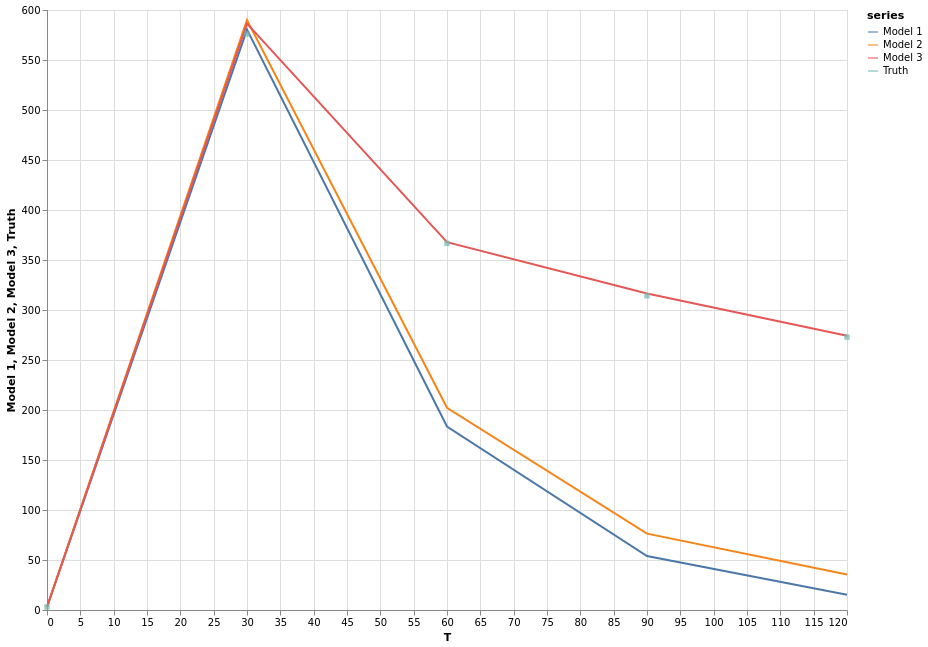

In [6]:
plot("Models vs. Actual", 
     [m1, m2, m3, ground_truth],
     times,
     "T")

## Distribution of Model Predictions

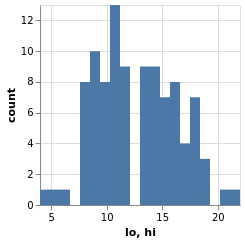

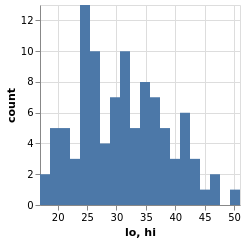

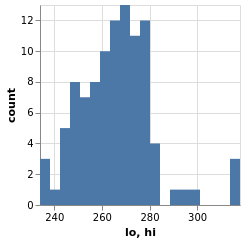

In [7]:
histogram(sample(model1.I at max(data.time) + 7, 100), 20)
histogram(sample(model2.I at max(data.time) + 7, 100), 20)
histogram(sample(model3.I at max(data.time) + 7, 100), 20)

In [8]:
simulate(model3.I at times)


[3 @ 0, 576.0670123162348 @ 30, 366.6307194296948 @ 60, 314.1937589113305 @ 90, 272.92382851403346 @ 120]

In [9]:
max(model3_samples)

[3, 676, 424, 366, 335]